In [2]:
# cd C:\Users\mpoli\Desktop\Git\Deeplearning\Pandas_data_analysis
# jupyter nbconvert --to script iris.ipynb

import urllib.request as req # 웹에서 다운로드 할 때
import matplotlib.pyplot as plt # 그래프
from sklearn.cluster import KMeans # K-평균 알고리즘
from sklearn.preprocessing import StandardScaler # 데이터 Nomalization
from sklearn.manifold import TSNE
import pandas as pd
import os 

In [4]:
DOWNLOAD_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
DATA_PATH = os.path.join('data') # data save folder
ColumnList = ['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class'] # iris data의 Column List

In [6]:
def fetch_iris_data(): # data 폴더와 iris의 데이터 csv 파일 생성
    if not os.path.isdir(DATA_PATH):
        os.makedirs(DATA_PATH)
    csv_path = os.path.join(DATA_PATH,'iris.csv')
    if not os.path.isfile(csv_path):
        req.urlretrieve(DOWNLOAD_ROOT, csv_path)

def load_iris_data(): # iris data의 csv파일을 return하는 함수
    csv_path = os.path.join(DATA_PATH,'iris.csv')
    return pd.read_csv(csv_path, names=ColumnList)

In [8]:
fetch_iris_data()
iris = load_iris_data()

ClassList = iris['class'].unique() #class의 List (꽃 종류)

In [10]:
model = TSNE(n_components=2, verbose=1, random_state=123)
transformed = model.fit_transform(iris.iloc[:,:1])
result = pd.DataFrame(transformed, columns=['x','y'])
feature = pd.concat([result, iris['class']], axis=1)
r= feature

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.196576
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.863441
[t-SNE] KL divergence after 1000 iterations: 0.041810


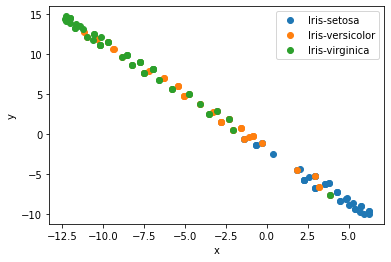

In [12]:
for flower in ClassList:
    flowerList = r[r['class']==flower]
    plt.plot(flowerList['x'],flowerList['y'], 'o')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(ClassList, loc='best')

In [14]:
df=pd.DataFrame({'predict':predict['predict'],'class':new_iris['class']})
ct = pd.crosstab(df['predict'], df['class'])
ct

NameError: name 'predict' is not defined

정확도는 100%, 78%, 72% 순이다.

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_samples(predict, new_iris['class'])

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
       -0.64820513, -0.64820513, -0.64820513,  0.55102041,  0.55102041,
        0.55102041, -0.64820513,  0.55102041,  0.55102041,  0.55102041,
        0.55102041,  0.55102041,  0.55102041,  0.55102041,  0.55102041,
       -0.64820513,  0.55102041,  0.55102041,  0.55102041,  0.55